In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [7]:
data = pd.read_csv("Liver_GSE14520_U133A.csv")
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM362958.CEL.gz,HCC,6.801198,4.553189,6.787790,5.430893,3.250222,6.272688,3.413405,3.374910,...,10.735084,10.398843,12.298551,12.270505,3.855588,3.148321,3.366087,3.199008,3.160388,3.366417
1,GSM362959.CEL.gz,HCC,7.585956,4.193540,3.763183,6.003593,3.309387,6.291927,3.754777,3.587603,...,11.528447,11.369919,12.867048,12.560433,4.016561,3.282867,3.541994,3.548680,3.460083,3.423348
2,GSM362960.CEL.gz,HCC,7.803370,4.134075,3.433113,5.395057,3.476944,5.825713,3.505036,3.687333,...,10.892460,10.416151,12.356337,11.888482,3.839367,3.598851,3.516791,3.484089,3.282626,3.512024
3,GSM362964.CEL.gz,HCC,6.920840,4.000651,3.754500,5.645297,3.387530,6.470458,3.629249,3.577534,...,10.686871,10.524836,12.006596,11.846195,3.867602,3.180472,3.309547,3.425501,3.166613,3.377499
4,GSM362965.CEL.gz,HCC,6.556480,4.599010,4.066155,6.344537,3.372081,5.439280,3.762213,3.440714,...,11.014454,10.775566,12.657182,12.573076,4.091440,3.306729,3.493704,3.205771,3.378567,3.392938


In [8]:
print(data.dtypes) # show the types of the data
print("   ")
print("amount of columns:",len(data.columns))
print("lenght of the columns:", len(data["samples"]))

print(data['type'].value_counts())



samples             object
type                object
1007_s_at          float64
1053_at            float64
117_at             float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 22279, dtype: object
   
amount of columns: 22279
lenght of the columns: 357
HCC       181
normal    176
Name: type, dtype: int64


In [9]:
for col in data.columns:
    percentage = 100/len(data[col]) * len(data[col].dropna())
    print(f"{col:>12}: {percentage:.2f}%")
# check nan values. the data should not have any nan values for the PCA
# no nan values found


     samples: 100.00%
        type: 100.00%
   1007_s_at: 100.00%
     1053_at: 100.00%
      117_at: 100.00%
      121_at: 100.00%
   1255_g_at: 100.00%
     1294_at: 100.00%
     1316_at: 100.00%
     1320_at: 100.00%
   1405_i_at: 100.00%
     1431_at: 100.00%
     1438_at: 100.00%
     1487_at: 100.00%
   1494_f_at: 100.00%
   1598_g_at: 100.00%
   160020_at: 100.00%
     1729_at: 100.00%
     1773_at: 100.00%
      177_at: 100.00%
      179_at: 100.00%
     1861_at: 100.00%
 200000_s_at: 100.00%
   200001_at: 100.00%
   200002_at: 100.00%
 200003_s_at: 100.00%
   200004_at: 100.00%
   200005_at: 100.00%
   200006_at: 100.00%
   200007_at: 100.00%
 200008_s_at: 100.00%
   200009_at: 100.00%
   200010_at: 100.00%
 200011_s_at: 100.00%
 200012_x_at: 100.00%
   200013_at: 100.00%
 200014_s_at: 100.00%
 200015_s_at: 100.00%
 200016_x_at: 100.00%
   200017_at: 100.00%
   200018_at: 100.00%
 200019_s_at: 100.00%
   200020_at: 100.00%
   200021_at: 100.00%
   200022_at: 100.00%
 200023_s_

In [10]:
# check skew
hcc = data[data["type"] == "HCC"]
normal = data[data["type"] == "normal"]

skewness_normal = normal.skew()
skewness_normal = [(skewness_normal < - 0.75)|(skewness_normal>0.75)]

skewness_hcc = hcc.skew()
skewness_hcc = [(skewness_hcc < - 0.75)|(skewness_hcc>0.75)]




/tmp/ipykernel_3555970/2218863494.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness_normal = normal.skew()
/tmp/ipykernel_3555970/2218863494.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness_hcc = hcc.skew()


In [28]:
# scale the data
#split the data and remove the ID
sc = StandardScaler()
ID = data["type"]
values = data.drop(columns=["samples", "type"])
values_scaled = sc.fit_transform(values)


#initiate instance
values_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', random_state = 42)
#fit 
values_embedded = values_embedded.fit_transform(values_scaled)


array([[-0.14917505,  0.36521656,  6.09938288, ..., -0.18924403,
        -0.36701248,  0.55597647],
       [ 0.83873266, -0.33130023, -0.51294781, ...,  1.91295014,
         2.24644276,  0.92643471],
       [ 1.11242867, -0.44646376, -1.23453866, ...,  1.52463844,
         0.69894804,  1.50345682],
       ...,
       [ 0.72291964, -0.3173813 , -0.45098048, ..., -0.14971803,
        -1.16413762, -0.86496523],
       [-0.1063254 , -0.48765805, -0.19655009, ..., -0.27285289,
        -1.0130549 , -0.37036839],
       [ 0.42227974, -1.77827261, -0.61758153, ..., -0.58118514,
         0.45802027,  0.33331158]])

In [12]:
#Create dataframe
TSNE_df = pd.DataFrame(
    data=values_embedded, 
    columns=['PC1', 'PC2'])
 
# map target names to PCA features   
TSNE_df["ID"] = ID
TSNE_df

,PC1,PC2,ID
0,11.512972,5.531141,HCC
1,13.687350,4.835027,HCC
2,14.249743,4.606369,HCC
3,12.121619,4.027994,HCC
4,12.911609,5.395123,HCC
...,...,...,...
352,11.290370,0.019957,normal
353,-0.867141,-3.510314,normal
354,-10.753676,-3.709654,normal
355,3.526120,4.272584,normal


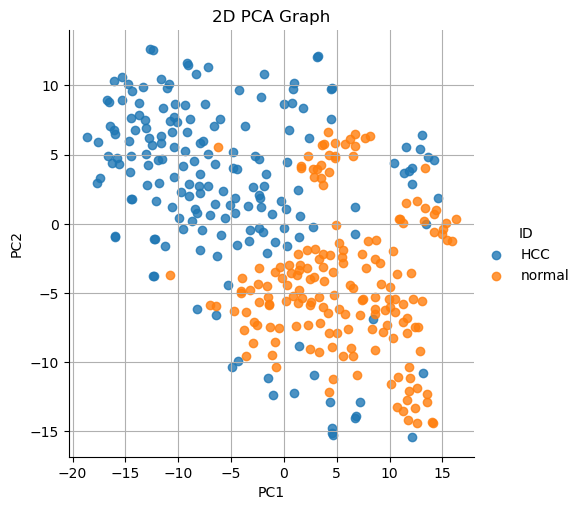

In [13]:
# plot the TSNE data 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=TSNE_df, 
    hue='ID', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.grid()
plt.show()

# PCA

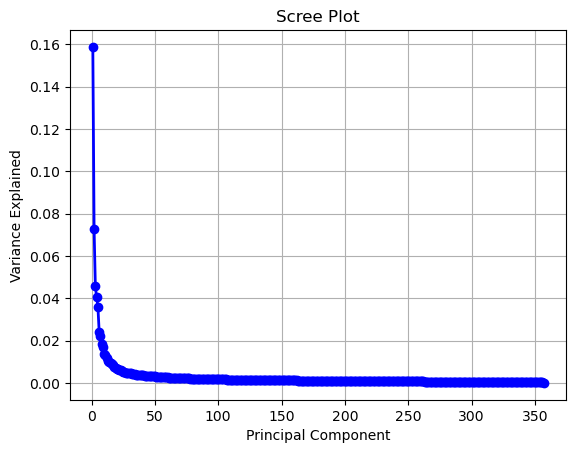

PC component 1 captures 0.15877540303145865
PC component 2 captures 0.07271267420075746
PC component 3 captures 0.04573388041898839
PC component 4 captures 0.040467080917053457
PC component 5 captures 0.03607266739784497
PC component 6 captures 0.024277029708821285
PC component 7 captures 0.022268101802671234
PC component 8 captures 0.01842571102417372
PC component 9 captures 0.016953282802804625
PC component 10 captures 0.01367326114570912
PC component 11 captures 0.013270528820163597
PC component 12 captures 0.011883274607991963
PC component 13 captures 0.010574336478365535
PC component 14 captures 0.009920121812528456
PC component 15 captures 0.009639332018423426
PC component 16 captures 0.008711847129369375
PC component 17 captures 0.008370512796589928
PC component 18 captures 0.0074883008865182215
PC component 19 captures 0.006927614896338399
PC component 20 captures 0.006793682295760212
PC component 21 captures 0.006455478200245188
PC component 22 captures 0.006163017566618159
PC

In [14]:
pca = PCA()

pca_features = pca.fit_transform(values_scaled)


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()

for i, component in enumerate( pca.explained_variance_ratio_):
    print(f"PC component {i+1} captures {pca.explained_variance_ratio_[i]}")
# based on this we going to use the 2 components 

In [15]:
pca = PCA(n_components=2)

pca_features = pca.fit_transform(values_scaled)
PCA_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])
 
# map target names to PCA features   
PCA_df["ID"] = ID
PCA_df


,PC1,PC2,ID
0,-40.953754,34.530189,HCC
1,-14.051424,72.058123,HCC
2,10.337729,83.319982,HCC
3,-2.609902,27.972695,HCC
4,-1.692187,43.958135,HCC
...,...,...,...
352,70.516977,-14.522713,normal
353,8.663628,-58.994313,normal
354,-70.391089,-13.391914,normal
355,25.803338,-49.749523,normal


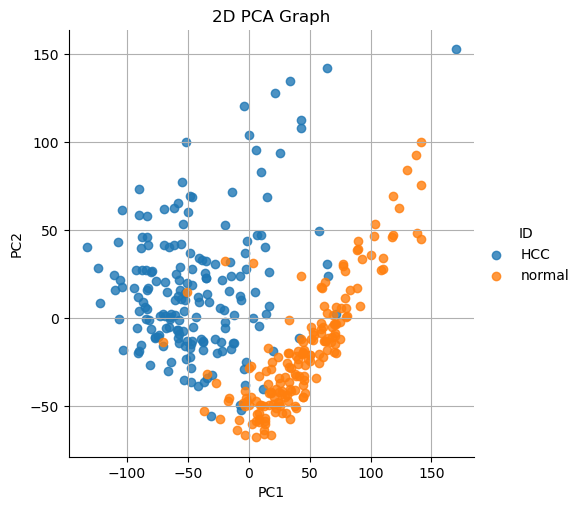

In [16]:
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=PCA_df, 
    hue='ID', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.grid()
plt.show()


# Hypertuning the parameter

In [45]:
prep = Pipeline([('scaler', StandardScaler()),
                 ("pca", PCA(n_components=2))]
               )
results_pipe  = prep.fit_transform(values)
PCA_df = pd.DataFrame(
    data = results_pipe, 
    columns=['PC1', 'PC2'])
PCA_df["ID"] = ID
PCA_df

,PC1,PC2,ID
0,-40.953754,34.530187,HCC
1,-14.051424,72.058115,HCC
2,10.337729,83.319979,HCC
3,-2.609902,27.972693,HCC
4,-1.692187,43.958132,HCC
...,...,...,...
352,70.516977,-14.522713,normal
353,8.663628,-58.994309,normal
354,-70.391089,-13.391916,normal
355,25.803338,-49.749524,normal


In [53]:
hyperparams = {
    "perplexity": [5, 8, 10, 13, 16, 19, 25, 35, 50],
    "TSNE__random_state": [42],
    "TSNE__init": ['auto', 'random']
}
prep = Pipeline([('scaler', StandardScaler()),
                 ("TCNE", TSNE(n_components=2))])


grid_search = GridSearchCV(estimator=prep, param_grid=hyperparams, cv=10, n_jobs=-1)

grid_search.fit(values)

print(grid_search.best_params_)
print(grid_search.best_score_)


TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator Pipeline(steps=[('scaler', StandardScaler()), ('TCNE', TSNE())]) does not.